In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import rawpy
import cv2
import math

## Resizing images to 500px the long edge by interpolation

In [61]:
def long_edge_resize500(img):
    height = img.shape[0]
    width = img.shape[1]
    if height>width:
        new_h = 500
        new_w = int(width/height*500) 
    else:
        new_w=500
        new_h=int(height/width*500)
    print("new shape is {},{}".format(new_w, new_h))
    return cv2.resize(img, (new_w, new_h), cv2.INTER_AREA)
        
    

## Conversion from RGB to LAB and only isolate L

In [62]:
raw_RGB = rawpy.imread("data/a0001-jmac_DSC1459.dng").postprocess()
expertA_RGB = cv2.cvtColor(cv2.imread("/media/samuel/HDD1TB/data.csail.mit.edu/graphics/fivek/img/tiff16_a/a0001-jmac_DSC1459.tif", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
#expertB_RGB = cv2.cvtColor(cv2.imread("/media/samuel/HDD1TB/data.csail.mit.edu/graphics/fivek/img/tiff16_b/a0001-jmac_DSC1459.tif", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
#expertC_RGB = cv2.cvtColor(cv2.imread("/media/samuel/HDD1TB/data.csail.mit.edu/graphics/fivek/img/tiff16_c/a0001-jmac_DSC1459.tif", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
#expertD_RGB = cv2.cvtColor(cv2.imread("/media/samuel/HDD1TB/data.csail.mit.edu/graphics/fivek/img/tiff16_d/a0001-jmac_DSC1459.tif", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
#expertE_RGB = cv2.cvtColor(cv2.imread("/media/samuel/HDD1TB/data.csail.mit.edu/graphics/fivek/img/tiff16_e/a0001-jmac_DSC1459.tif", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

In [63]:
def basic_showImg(img, size=4):
    plt.figure(figsize=(size,size))
    plt.imshow(img)
    plt.show()

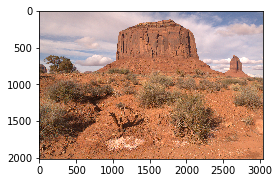

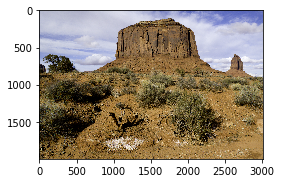

In [64]:
basic_showImg(raw_RGB)
basic_showImg(expertA_RGB)

In [65]:
raw_RGB = long_edge_resize500(raw_RGB)
expertA_RGB = long_edge_resize500(expertA_RGB)


new shape is 500,331
new shape is 500,332


In [66]:
# https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#color_convert_rgb_lab
raw_LAB = cv2.cvtColor(raw_RGB, cv2.COLOR_RGB2Lab)
expertA_LAB = cv2.cvtColor(expertA_RGB, cv2.COLOR_RGB2Lab)

In [67]:
raw_lum = raw_LAB[:,:,0]
expertA_lum = expertA_LAB[:,:,0]

In [68]:
raw_lum

array([[188, 189, 189, ..., 155, 155, 156],
       [189, 190, 190, ..., 154, 156, 156],
       [190, 191, 190, ..., 153, 152, 152],
       ...,
       [159, 150, 130, ..., 164, 163, 164],
       [135, 139, 140, ..., 167, 166, 165],
       [132, 122,  77, ..., 165, 166, 168]], dtype=uint8)

In [69]:
expertA_lum

array([[193, 193, 194, ..., 141, 144, 150],
       [194, 195, 195, ..., 149, 151, 152],
       [194, 192, 192, ..., 142, 141, 142],
       ...,
       [123,  36,  99, ..., 153, 153, 147],
       [117, 131,  14, ..., 152, 152, 149],
       [110,  81, 107, ..., 149, 147, 150]], dtype=uint8)

In [70]:
raw_lum/255*100

array([[73.7254902 , 74.11764706, 74.11764706, ..., 60.78431373,
        60.78431373, 61.17647059],
       [74.11764706, 74.50980392, 74.50980392, ..., 60.39215686,
        61.17647059, 61.17647059],
       [74.50980392, 74.90196078, 74.50980392, ..., 60.        ,
        59.60784314, 59.60784314],
       ...,
       [62.35294118, 58.82352941, 50.98039216, ..., 64.31372549,
        63.92156863, 64.31372549],
       [52.94117647, 54.50980392, 54.90196078, ..., 65.49019608,
        65.09803922, 64.70588235],
       [51.76470588, 47.84313725, 30.19607843, ..., 64.70588235,
        65.09803922, 65.88235294]])

In [76]:
raw_LAB[:,:,0]=expertA_lum[0:331,:]